In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
len(mnist.train.images)

55000

In [6]:
print(mnist.train.images.shape)

(55000, 784)


In [7]:
img=mnist.train.images[0,:]

In [8]:
print(img.shape)

(784,)


In [9]:
img1=img.reshape(28,28)

In [10]:
print(img1.shape)

(28, 28)


In [11]:
import matplotlib as plot

In [12]:
type(img1)

numpy.ndarray

In [14]:
plot.pyplot.imshow(img1)

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [15]:
from matplotlib import pyplot as plt

In [16]:
plt.imshow(img1)

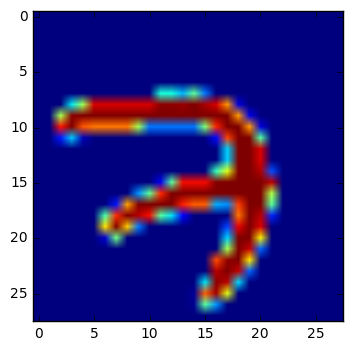

In [17]:
plt.show()

In [18]:
dir(mnist)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '_asdict',
 '_fields',
 '_make',
 '_replace',
 '_source',
 'count',
 'index',
 'test',
 'train',
 'validation']

In [19]:
print(mnist.train.labels[0
                        ])

[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


In [20]:
import tensorflow as tf

In [21]:
x=tf.placeholder(tf.float32,[None,784])

In [24]:
W=tf.Variable(tf.zeros([784,10]))
b=tf.Variable(tf.zeros([10]))

In [26]:
y=tf.nn.softmax(tf.matmul(x,W)+b)

In [27]:
y_=tf.placeholder(tf.float32,[None,10])

In [28]:
cross_entroy=tf.reduce_mean(-tf.reduce_sum(y_*tf.log(y),reduction_indices=[1]))

In [29]:
cross_entroy=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_,logits=y))

In [30]:
train_step=tf.train.GradientDescentOptimizer(0.5).minimize(cross_entroy)

In [31]:
init = tf.global_variables_initializer()

In [32]:
with tf.Session() as sess:
    sess.run(init)
    
    for i in range(1000):
        batch_xs,batch_ys=mnist.train.next_batch(100)
        sess.run(train_step,feed_dict={x:batch_xs,y_:batch_ys})
    
    correct_prediction=tf.equal(tf.argmax(y,1),tf.arg_max(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    print(sess.run(accuracy,feed_dict={x:mnist.train.images,y_:mnist.train.labels}))

0.900564
